    Lab 1
    Author: Morgan Gere
    IST-718
    10/18/2022

In [3025]:
# Importing the coaches data set using pandas
import pandas as pd
coaches = pd.read_csv(r"C:\Users\Morga\programsMG\Big_Analytics\Coaches9.csv")

# Initial look into the data

An initial look at the data reveals there was NA values that were being represented by "--".  There was punctuation displayed in the numerical data including dollar signs and commas.  A look at the info revealed there were in object format in the data frame not int64, meaning these are strings in a list not intergers in a list. 

In [3026]:
# Looking at the top 5 rows.
coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [3027]:
#checking row length to make sure data isn't lost
len(coaches)

129

In [3028]:
coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [3029]:
#showing two examples of the type of the observations.
print("School type:",type(coaches["School"][0]))
print("TotalPay type:", type(coaches["TotalPay"][0]))

School type: <class 'str'>
TotalPay type: <class 'str'>


In [3030]:
#checking column names
for col in coaches.columns:
    print(col)

School
Conference
Coach
SchoolPay
TotalPay
Bonus
BonusPaid
AssistantPay
Buyout


In [3031]:
#checking to see if there are any values other than $0 for AssistantPay.
coaches["AssistantPay"].unique()

array(['$0 '], dtype=object)

Since new information was to be gathered and placed into the data frame the unused columns were removed for simplicity. The goal was chosen to predict TotalPay.  Since SchoolPay was not used it was dropped.  The initial look at the data revealed that AssistantPay only contained the values of $0 and was dropped. Since Bonus is another portion of the coach’s contract, that information would not be available for use when predicting the salary(TotalPay), the same applies to BounsPaid, and Buyout.  It is possible to create a model using Bonus and Buyout.  In that case different bonus and buyout amounts could be used to see how it changes the salary (TotalPay) prediction. This was not done as there were a variety of other variables to be used and it would be complicated to place an amount into these without high subject knowledge. 

In [3032]:
#Dropping Columns
coaches.drop('SchoolPay', axis=1, inplace=True)
coaches.drop('AssistantPay', axis=1, inplace=True)
coaches.drop('Bonus', axis=1, inplace=True)
coaches.drop('BonusPaid', axis=1, inplace=True)
coaches.drop('Buyout', axis=1, inplace=True)

In [3033]:
# Looking at the dataframe.
print(coaches.to_string())

                    School Conference               Coach     TotalPay
0                Air Force   Mt. West        Troy Calhoun       885000
1                    Akron        MAC        Terry Bowden    $412,500 
2                  Alabama        SEC          Nick Saban  $8,307,000 
3    Alabama at Birmingham      C-USA          Bill Clark    $900,000 
4        Appalachian State   Sun Belt   Scott Satterfield    $712,500 
5                  Arizona     Pac-12        Kevin Sumlin  $2,000,000 
6            Arizona State     Pac-12        Herm Edwards  $2,000,000 
7                 Arkansas        SEC         Chad Morris  $3,500,000 
8           Arkansas State   Sun Belt      Blake Anderson    $825,000 
9                     Army       Ind.         Jeff Monken       932521
10                  Auburn        SEC         Gus Malzahn  $6,705,656 
11              Ball State        MAC            Mike Neu    $435,689 
12                  Baylor     Big 12          Matt Rhule           --
13    

In [3034]:
#checking row length to make sure data isn't lost
len(coaches)

129

When starting this project because the data was unframiliar a dataframe was created to explain column names for understanting throughout the project.  This was left in to show some behind the scences magic.

In [3035]:
#creating an empty list to add dictionary items into
legend = []
# creating a dictionary for each column
legend.append({"column":"School","Description":"University Name"})
legend.append({"column":"Conference","Description":"Grouping of teams(most games played in thier own grouping)"})
legend.append({"column":"Coach","Description":"Head Coach Name"})
legend.append({"column":"TotalPay","Description":"Salary for the Head Coach"})
#legend.append({"column":"Bonus","Description":"Total possible extra money to be made bassed on team performance"})
#legend.append({"column":"BonusPaid","Description":"How much of the bonus the coach aquired based on team performance"})
#legend.append({"column":"Buyout","Description":"Amount the coach is paid if fired without cause"})
legend.append({"column":"stadium_capacity","Description":"Total seats avalible for games"})
legend.append({"column":"gsr","Description":"Graduation Success Rate"})
legend.append({"column":"fgr","Description":"Federal Graduation Rate (Freshman graduation rate): number of freshman that graduate"})
legend.append({"column":"win","Description":"Total wins for each team in 2021"})
legend.append({"column":"loss","Description":"Total lost games for each team in 2021"})
legend.append({"column":"win_percent","Description":"Percentage of games won by each team in 2021"})


legend_df = pd.DataFrame(legend)

In [3036]:
# Making the column name the index for easy access
legend_df.set_index('column',inplace=True)

In [3037]:
#shoing an example of how this dataframe was used.
legend_df.loc['School']

Description    University Name
Name: School, dtype: object

# Data Cleaning

For each column that contains numeric data the punctuation must be removed, then the type needs to be changed to integer so that mathematical analysis can be performed.  Even though Bonus, BonusPaid, and Buyout were removed the cleaning of Bonus, BonusPaid, and Buyout was commented out but left in.  This was done so in case a model using any of these was used the work wasn't required to be done again.

##### TotalPay

In [3038]:
#Changing the totalpay to a list to remove punctuation and change into an integer type.
total_pay_temp = coaches["TotalPay"].tolist()

In [3039]:
# Creating a new temp list to place the fixed observations.
total_pay_temp_2 = []

for item in total_pay_temp:
    #Removing $
    temp1 = item.replace('$','')
    #Removing commas in the numbers
    temp2 = temp1.replace(',','')
    # Changing -- which is NA to 0 (these will be fixed in the proceeding steps)
    temp3 = temp2.replace('--','0')
    # Converting to integer type
    temp4 = int(temp3)
    # adding to the temp list
    total_pay_temp_2.append(temp4)
#checking the temp list
print(total_pay_temp_2)
    
    

[885000, 412500, 8307000, 900000, 712500, 2000000, 2000000, 3500000, 825000, 932521, 6705656, 435689, 0, 1650010, 2514859, 437228, 0, 455500, 1500000, 1700000, 655000, 625000, 2000000, 6543350, 400000, 2878500, 1800000, 1100000, 2540928, 1102500, 460000, 6070000, 1000000, 945000, 5000000, 1550000, 6603600, 650000, 569000, 3060018, 486504, 1750000, 5000000, 1830000, 4700000, 3500000, 1701109, 3500000, 440000, 4013600, 947281, 700000, 850000, 390000, 3980434, 3500000, 762570, 2512000, 500000, 2600000, 4058061, 524826, 7504000, 4390417, 803004, 3550000, 3000000, 2600000, 2350000, 2163000, 5000000, 500000, 600000, 823740, 419640, 2575000, 3000000, 1425000, 633460, 3619775, 2129638, 580331, 7600000, 4800000, 5000000, 654667, 2500000, 1900008, 4800000, 3017718, 3800000, 0, 2200000, 873576, 590424, 600000, 4200000, 1000000, 2625965, 0, 500000, 4311543, 2401206, 3846000, 5500000, 7500000, 4840717, 700000, 3703975, 700000, 1100000, 1125000, 810000, 1629000, 1518177, 3300000, 3787917, 900000, 28

In [3040]:
#Removing the old column
coaches.drop('TotalPay', axis=1, inplace=True)

In [3041]:
#adding the temp list into the dataframe
coaches['TotalPay']=total_pay_temp_2

In [3042]:
#inspecting the first 5 rows of the dataframe
coaches.head()

,School,Conference,Coach,TotalPay
0,Air Force,Mt. West,Troy Calhoun,885000
1,Akron,MAC,Terry Bowden,412500
2,Alabama,SEC,Nick Saban,8307000
3,Alabama at Birmingham,C-USA,Bill Clark,900000
4,Appalachian State,Sun Belt,Scott Satterfield,712500


In [3043]:
#checking for 0 (the NA values we replaced previouslys (-- to 0))
print(len(coaches))
print(coaches[coaches['TotalPay']==0])

129
                School Conference           Coach  TotalPay
12              Baylor     Big 12      Matt Rhule         0
16       Brigham Young       Ind.   Kalani Sitake         0
91                Rice      C-USA  Mike Bloomgren         0
99  Southern Methodist        AAC     Sonny Dykes         0


Since the information from private schools does not need to be desclosed there are gaps in the information of some of the schools.  Any of the four schools that are missing Totalpay are also missing all other relavent information they were removed in order to not have missing values.

In [3044]:
#removing the rows where total pay is not found
coaches=coaches[coaches['TotalPay']!=0]

In [3045]:
# making sure the rows were removed successfully
print(len(coaches))
print(coaches[coaches['TotalPay']==0])

125
Empty DataFrame
Columns: [School, Conference, Coach, TotalPay]
Index: []


##### Bonus

In [3046]:
#Chaning the totalpay to a list to remove punctuation and change into an integer type.
#bonus_temp = coaches["Bonus"].tolist()

In [3047]:
# Creating a new temp list to place the fixed observations.
#bonus_temp_2 = []

#for item in bonus_temp:
    #Removing $
#    temp1 = item.replace('$','')
    #Removing commas in the numbers
#    temp2 = temp1.replace(',','')
    # Changing -- which is NA to 0 (these will be fixed in the proceeding steps)
#    temp3 = temp2.replace('--','0')
    # Converting to integer type
#    temp4 = int(temp3)
    # adding to the temp list
#    bonus_temp_2.append(temp4)
#checking the temp list
#print(bonus_temp_2)

In [3048]:
#Removing the old column
#coaches.drop('Bonus', axis=1, inplace=True)

In [3049]:
#adding the temp list into the dataframe
#coaches['Bonus']=bonus_temp_2

In [3050]:
#inspecting the first 5 rows of the dataframe
#coaches.head()

In [3051]:
#checking for 0 (the NA values we replaced previouslys (-- to 0))
#print(len(coaches))
#print(coaches[coaches['Bonus']==0])

##### BonusPaid

In [3052]:
#Chaning the totalpay to a list to remove punctuation and change into an integer type.
#bonuspaid_temp = coaches["BonusPaid"].tolist()

In [3053]:
# Creating a new temp list to place the fixed observations.
#bonuspaid_temp_2 = []

#for item in bonuspaid_temp:
    #Removing $
#    temp1 = item.replace('$','')
    #Removing commas in the numbers
#    temp2 = temp1.replace(',','')
    # Changing -- which is NA to 0 (these will be fixed in the proceeding steps)
#    temp3 = temp2.replace('--','0')
    # Converting to integer type
#    temp4 = int(temp3)
    # adding to the temp list
#    bonuspaid_temp_2.append(temp4)
#checking the temp list
#print(bonuspaid_temp_2)

In [3054]:
#Removing the old column
#coaches.drop('BonusPaid', axis=1, inplace=True)

In [3055]:
#adding the temp list into the dataframe
#coaches['BonusPaid']=bonus_temp_2

In [3056]:
#inspecting the first 5 rows of the dataframe
#coaches.head()

In [3057]:
#checking for 0 (the NA values we replaced previouslys (-- to 0))
#print(len(coaches))
#print(coaches[coaches['BonusPaid']==0])

##### Buyout

In [3058]:
#Chaning the totalpay to a list to remove punctuation and change into an integer type.
#buyout_temp = coaches["Buyout"].tolist()

In [3059]:
# Creating a new temp list to place the fixed observations.
#buyout_temp_2 = []

#for item in buyout_temp:
    #Removing $
#    temp1 = item.replace('$','')
    #Removing commas in the numbers
#    temp2 = temp1.replace(',','')
    # Changing -- which is NA to 0 (these will be fixed in the proceeding steps)
#    temp3 = temp2.replace('--','0')
    # Converting to integer type
#    temp4 = int(temp3)
    # adding to the temp list
#    buyout_temp_2.append(temp4)
#checking the temp list
#print(buyout_temp_2)

In [3060]:
#Removing the old column
#coaches.drop('Buyout', axis=1, inplace=True)

In [3061]:
#adding the temp list into the dataframe
#coaches['Buyout']=bonus_temp_2

In [3062]:
#inspecting the first 5 rows of the dataframe
#coaches.head()

In [3063]:
#checking for 0 (the NA values we replaced previouslys (-- to 0))
#print(len(coaches))
#print(coaches[coaches['Buyout']==0])

In [3064]:
#taking a look at the data frame
coaches.head()

,School,Conference,Coach,TotalPay
0,Air Force,Mt. West,Troy Calhoun,885000
1,Akron,MAC,Terry Bowden,412500
2,Alabama,SEC,Nick Saban,8307000
3,Alabama at Birmingham,C-USA,Bill Clark,900000
4,Appalachian State,Sun Belt,Scott Satterfield,712500


In [3065]:
# looking at basic info
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   School      125 non-null    object
 1   Conference  125 non-null    object
 2   Coach       125 non-null    object
 3   TotalPay    125 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [3066]:
# looking at basic descriptive statistics
print('\nSchool\n',coaches["School"].describe())
print('\nConference\n',coaches["Conference"].describe())
print('\nCoach\n',coaches["Coach"].describe())
print('\nTotalPay\n',coaches["TotalPay"].describe())


School
 count     125
unique    125
top       LSU
freq        1
Name: School, dtype: object

Conference
 count     125
unique     11
top       ACC
freq       14
Name: Conference, dtype: object

Coach
 count               125
unique              125
top       Steve Addazio
freq                  1
Name: Coach, dtype: object

TotalPay
 count    1.250000e+02
mean     2.417061e+06
std      1.885752e+06
min      3.900000e+05
25%      8.058500e+05
50%      1.900008e+06
75%      3.617500e+06
max      8.307000e+06
Name: TotalPay, dtype: float64


# Adding New Data From Other Sources

##### Stadium Capacity

Stadium information comes from https://bleacherreport.com/articles/1145292-power-ranking-all-124-college-football-stadiums, along with https://stadiumcapacity.com/ and google.  This was manually entered.  For adding information into the data three approaches were used.  This is the first it is the worst possible way as the order needs to not change and it is not possible to see which school the data corresponds to until it is added to the data set.

In [3067]:
# Creating a list of the stadium capacitys in order.
stadium_capacity = [46692,30000,100077,71594,60000,57803,73379,76000,30964,38000,
                    87451,25400,32000,44500,23724,29013,72516,45301,
                    30199,15314,35097,80301,21000,53750,34400,40000,40040,50000,
                    30200,88548,30000,23500,84300,41031,92746,25000,24333,55000,
                    50000,32000,62872,49225,70585,55000,50071,52200,20500,67606,
                    21088,30600,31000,30427,55000,92400,38016,51500,68756,62380,
                    76500,76500,30200,75000,31000,50805,60850,55082,68349,34000,
                    81067,29993,36800,38634,30343,60000,40000,30850,24000,47130,
                    80795,24000,102329,82112,60000,21944,54000,45674,107282,65050,
                    62500,52454,71294,30456,40646,80250,66321,77500,
                    36000,50000,49262,102037,100119,83002,45000,15968,27000,51500,
                    30000,26248,30000,72968,30000,91136,45017,25513,39790,61500,
                    66233,31500,72500,35117,60000,22000,30200,80321,32580]

In [3068]:
#inserting the stadium capacity into the dataframe.
coaches.insert(2, 'stadium_capacity', stadium_capacity)

##### Graduation Rate

 Information was obtained from https://web3.ncaa.org/ and the cohort year was 2014.  This is the second way information was added it is easier to read but combersome in the markdown as it is long taking up a lot of space.  It would be easier to add information and it is easier to understand what the gsr score is associated with (which school it belongs to). 

In [3069]:
#Graduation Success Rate
#Creating a list of the gsr scores.
gsr = [
    89,#Air Force
    79,#Akron
    86,#Alabama
    69,#Alabama at Birmingham
    78,#Appalachian State
    73,#Arizona
    86,#Arizona State
    84,#Arkansas
    72,#Arkansas State
    71,#Army
    80,#Auburn
    82,#Ball State
    88,#Boise State
    92,#Boston College
    72,#Bowling Green
    86,#Buffalo
    84,#California
    82,#Central Florida
    81,#Central Michigan
    66,#Charlotte
    86,#Cincinnati
    88,#Clemson
    81,#Coastal Carolina
    77,#Colorado
    80,#Colorado State
    89,#Connecticut
    96,#Duke
    72,#East Carolina
    73,#Eastern Michigan
    93,#Florida
    75,#Florida Atlantic
    75,#Florida International
    58,#Florida State
    69,#Fresno State
    59,#Georgia
    64,#Georgia Southern
    81,#Georgia State
    85,#Georgia Tech
    73,#Hawaii
    68,#Houston
    91,#Illinois
    72,#Indiana
    87,#Iowa
    88,#Iowa State
    83,#Kansas
    93,#Kansas State
    81,#Kent State
    86,#Kentucky
    67,#Liberty
    63,#Louisiana Tech
    74,#Louisiana-Lafayette
    83,#Louisiana-Monroe
    93,#Louisville
    61,#LSU
    81,#Marshall
    83,#Maryland
    70,#Massachusetts
    90,#Memphis
    78,#Miami (Fla.)
    92,#Miami (Ohio)
    96,#Michigan
    84,#Michigan State
    95,#Middle Tennessee
    96,#Minnesota
    73,#Mississippi
    74,#Mississippi State
    77,#Missouri
    89,#Navy
    90,#Nebraska
    84,#Nevada
    74,#Nevada-Las Vegas
    65,#New Mexico
    83,#New Mexico State
    70,#North Carolina
    74,#North Carolina State
    83,#North Texas
    82,#Northern Illinois
    97,#Northwestern
    91,#Notre Dame
    91,#Ohio
    81,#Ohio State
    73,#Oklahoma
    74,#Oklahoma State
    70,#Old Dominion
    73,#Oregon
    82,#Oregon State
    87,#Penn State
    93,#Pittsburgh
    82,#Purdue
    71,#Rutgers
    84,#San Diego State
    67,#San Jose State
    79,#South Alabama
    89,#South Carolina
    79,#South Florida
    81,#Southern California
    73,#Southern Mississippi
    93,#Stanford
    88,#Syracuse
    84,#Tennessee
    79,#Texas
    74,#Texas A&M
    70,#Texas Christian
    70,#Texas State
    76,#Texas Tech
    85,#Texas-El Paso
    83,#Texas-San Antonio
    87,#Toledo
    80,#Troy
    87,#Tulane
    69,#Tulsa
    71,#UCLA
    90,#Utah
    89,#Utah State
    95,#Vanderbilt
    86,#Virginia
    80,#Virginia Tech
    89,#Wake Forest
    85,#Washington
    85,#Washington State
    74,#West Virginia
    74,#Western Kentucky
    74,#Western Michigan
    69,#Wisconsin
    87,#Wyoming
]

In [3070]:
#Inserting GSR into the dataframe.
coaches.insert(2, 'gsr', gsr)

In [3071]:
#Freshman Graduation Rate
# Creating a list of the scores
fgr = [
    89,#Air Force
    76,#Akron
    65,#Alabama
    42,#Alabama at Birmingham
    60,#Appalachian State
    55,#Arizona
    66,#Arizona State
    57,#Arkansas
    45,#Arkansas State
    71,#Army
    61,#Auburn
    65,#Ball State
    53,#Boise State
    76,#Boston College
    65,#Bowling Green
    69,#Buffalo
    76,#California
    68,#Central Florida
    73,#Central Michigan
    55,#Charlotte
    67,#Cincinnati
    66,#Clemson
    63,#Coastal Carolina
    56,#Colorado
    76,#Colorado State
    78,#Connecticut
    90,#Duke
    67,#East Carolina
    59,#Eastern Michigan
    37,#Florida
    60,#Florida Atlantic
    59,#Florida International
    43,#Florida State
    58,#Fresno State
    39,#Georgia
    55,#Georgia Southern
    70,#Georgia State
    70,#Georgia Tech
    47,#Hawaii
    58,#Houston
    79,#Illinois
    51,#Indiana
    65,#Iowa
    70,#Iowa State
    57,#Kansas
    72,#Kansas State
    59,#Kent State
    56,#Kentucky
    50,#Liberty
    48,#Louisiana Tech
    55,#Louisiana-Lafayette
    65,#Louisiana-Monroe
    82,#Louisville
    28,#LSU
    66,#Marshall
    73,#Maryland
    61,#Massachusetts
    62,#Memphis
    47,#Miami (Fla.)
    77,#Miami (Ohio)
    79,#Michigan
    68,#Michigan State
    64,#Middle Tennessee
    78,#Minnesota
    55,#Mississippi
    62,#Mississippi State
    55,#Missouri
    89,#Navy
    65,#Nebraska
    62,#Nevada
    61,#Nevada-Las Vegas
    42,#New Mexico
    63,#New Mexico State
    51,#North Carolina
    55,#North Carolina State
    62,#North Texas
    63,#Northern Illinois
    94,#Northwestern
    80,#Notre Dame
    77,#Ohio
    53,#Ohio State
    51,#Oklahoma
    57,#Oklahoma State
    51,#Old Dominion
    60,#Oregon
    69,#Oregon State
    71,#Penn State
    64,#Pittsburgh
    65,#Purdue
    55,#Rutgers
    69,#San Diego State
    61,#San Jose State
    57,#South Alabama
    64,#South Carolina
    61,#South Florida
    60,#Southern California
    56,#Southern Mississippi
    88,#Stanford
    76,#Syracuse
    52,#Tennessee
    62,#Texas
    54,#Texas A&M
    57,#Texas Christian
    54,#Texas State
    52,#Texas Tech
    63,#Texas-El Paso
    62,#Texas-San Antonio
    67,#Toledo
    65,#Troy
    76,#Tulane
    64,#Tulsa
    54,#UCLA
    69,#Utah
    68,#Utah State
    77,#Vanderbilt
    71,#Virginia
    68,#Virginia Tech
    75,#Wake Forest
    56,#Washington
    56,#Washington State
    60,#West Virginia
    57,#Western Kentucky
    40,#Western Michigan
    56,#Wisconsin
    52,#Wyoming
]

In [3072]:
#inserting FGR into the dataframe.
coaches.insert(2, 'fgr', fgr)

In [3073]:
#Checking the New Dataframe
coaches.head()

,School,Conference,fgr,gsr,stadium_capacity,Coach,TotalPay
0,Air Force,Mt. West,89,89,46692,Troy Calhoun,885000
1,Akron,MAC,76,79,30000,Terry Bowden,412500
2,Alabama,SEC,65,86,100077,Nick Saban,8307000
3,Alabama at Birmingham,C-USA,42,69,71594,Bill Clark,900000
4,Appalachian State,Sun Belt,60,78,60000,Scott Satterfield,712500


##### Win/loss Record  

Information gathered frrom https://betiq.teamrankings.com/college-football/betting-trends/win-loss-records/?season=2021.  The third way of adding data used was to create a excel file which will be submitted along with this markdown and read it into python as a pandas data frame.  Using a inner join on school the data is merged and then the columns were fixed to have the final data frame.

In [3074]:
# Importing the Win loss data set using pandas (Created in excel will provide seperately)
# Done as another way to showcase how to bring in and combine data
import pandas as pd
win_loss = pd.read_csv(r"C:\Users\Morga\programsMG\Big_Analytics\Win_Lose.csv")

In [3075]:
#Checking data frame
win_loss.head()

,School,win,loss,win_percent
0,Air Force,10,3,76.9
1,Akron,2,10,16.7
2,Alabama,13,2,86.7
3,Alabama at Birmingham,9,4,69.2
4,Appalachian State,9,3,75.0


In [3076]:
#setting the index to school
coaches.set_index('School',inplace=True)

In [3077]:
#setting the index to school
win_loss.set_index('School',inplace=True)

In [3078]:
#Preforming an inner join using merge
df=pd.merge(coaches, win_loss, left_index=True, right_index=True)

In [3079]:
# checking the data set with all new data added.
df.head()

,Conference,fgr,gsr,stadium_capacity,Coach,TotalPay,win,loss,win_percent
School,,,,,,,,,
Air Force,Mt. West,89,89,46692,Troy Calhoun,885000,10,3,76.9
Akron,MAC,76,79,30000,Terry Bowden,412500,2,10,16.7
Alabama,SEC,65,86,100077,Nick Saban,8307000,13,2,86.7
Alabama at Birmingham,C-USA,42,69,71594,Bill Clark,900000,9,4,69.2
Appalachian State,Sun Belt,60,78,60000,Scott Satterfield,712500,9,3,75.0


In [3080]:
#Checking the length to make sure no rows were lost
len(df)

125

# Running basic Statistics

In [3081]:
#checking basic info including NA Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, Air Force to Wyoming
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Conference        125 non-null    object 
 1   fgr               125 non-null    int64  
 2   gsr               125 non-null    int64  
 3   stadium_capacity  125 non-null    int64  
 4   Coach             125 non-null    object 
 5   TotalPay          125 non-null    int64  
 6   win               125 non-null    int64  
 7   loss              125 non-null    int64  
 8   win_percent       125 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 13.8+ KB


In [3082]:
#checking basic statistics
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,fgr,gsr,stadium_capacity,TotalPay,win,loss,win_percent
count,125.00000,125.00000,125.00000,125.00000,125.00000,125.00000,125.00000
mean,62.62400,80.29600,50996.96000,2417060.76000,6.60800,6.11200,50.97360
std,11.38524,8.86823,22665.48872,1885752.30454,3.14667,2.57223,22.17809
min,28.00000,58.00000,15314.00000,390000.00000,1.00000,1.00000,8.30000
25%,55.00000,73.00000,30600.00000,805850.00000,4.00000,4.00000,33.30000
50%,62.00000,81.00000,49225.00000,1900008.00000,7.00000,6.00000,53.80000
75%,69.00000,87.00000,68349.00000,3617500.00000,9.00000,8.00000,69.20000
max,94.00000,97.00000,107282.00000,8307000.00000,14.00000,11.00000,93.30000


# Exploritory Data Analysis (EDA)

In [3083]:
import matplotlib
#setting the graph parameters (size)
plt.rcParams["figure.figsize"] = (6,4)

An exploritoy data analysis was prefromed using graphs to gain information about the data and how it could effect the responses from the model.

##### Histogram by conference

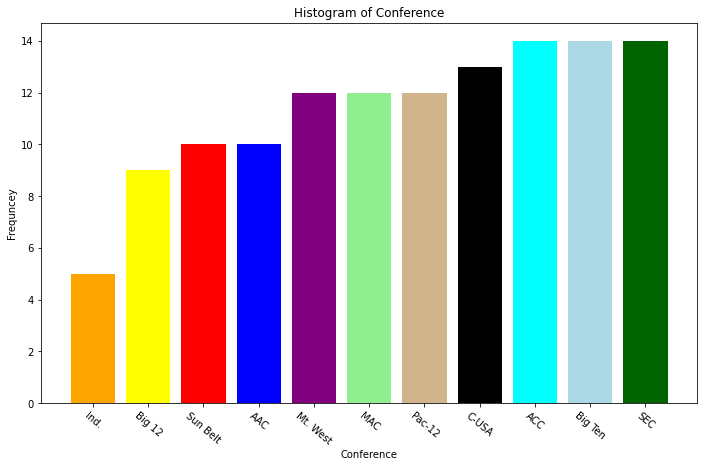

In [3084]:
import matplotlib.pyplot as plt
names =df['Conference'].value_counts(ascending=True).index
values = df['Conference'].value_counts(ascending=True)
colors = ['orange', 'yellow', 'red', 'blue', 'purple','lightgreen','tan','black','cyan','lightblue','darkgreen']
plt.figure(figsize=(40,7))

plt.subplot(131)
plt.bar(names,values,color=colors)
plt.xticks(rotation=320)
plt.ylabel('Frequncey')
plt.xlabel('Conference')
plt.title('Histogram of Conference')
plt.show()

##### Boxplot confrence and totalpay

In [3085]:
Ind =df[df['Conference']=='Ind.']
Big_12 =df[df['Conference']=='Big 12']
AAC =df[df['Conference']=='AAC']
Sun_Belt =df[df['Conference']=='Sun Belt']
MAC =df[df['Conference']=='MAC']
Mt_West =df[df['Conference']=='Mt. West']
C_USA =df[df['Conference']=='C-USA']       
Pac_12 =df[df['Conference']=='Pac-12']
Big_Ten =df[df['Conference']=='Big Ten']
ACC =df[df['Conference']=='ACC']
SEC =df[df['Conference']=='SEC']

<function matplotlib.pyplot.show(close=None, block=None)>

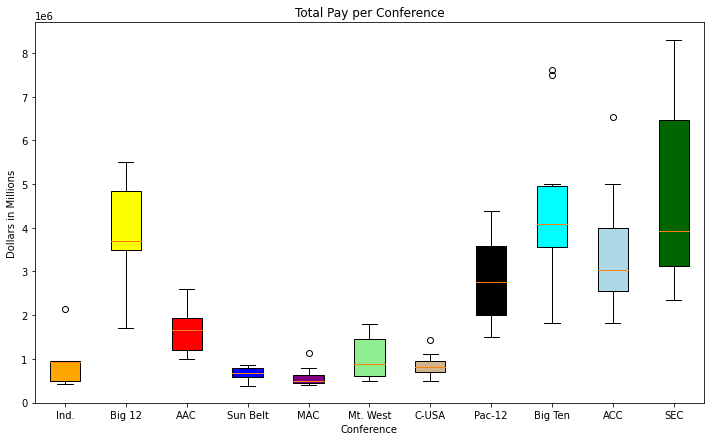

In [3086]:
conferences = [Ind['TotalPay'],Big_12['TotalPay'],AAC['TotalPay'],Sun_Belt['TotalPay'],MAC['TotalPay'],Mt_West['TotalPay'],
               C_USA['TotalPay'],Pac_12['TotalPay'],Big_Ten['TotalPay'],ACC['TotalPay'],SEC['TotalPay'],]
ticks=range(1,12)
labels =['Ind.', 'Big 12', 'AAC', 'Sun Belt', 'MAC', 'Mt. West', 'C-USA',
       'Pac-12', 'Big Ten', 'ACC', 'SEC']
colors = ['orange', 'yellow', 'red', 'blue', 'purple','lightgreen','tan','black','cyan','lightblue','darkgreen']
fig = plt.figure(figsize=(12,7))



box=plt.boxplot(conferences, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(ticks,labels)
plt.ylabel('Dollars in Millions')
plt.xlabel('Conference')
plt.title('Total Pay per Conference')
plt.show

When looking at the histogram of teams per conference next to the boxplot of total pay according to conference. (Color coded by conference) of the higher paid conferences there are more teams in the data set.  This will lead to our model being skewed to the towards higher pay overall. 

##### Win Count

<function matplotlib.pyplot.show(close=None, block=None)>

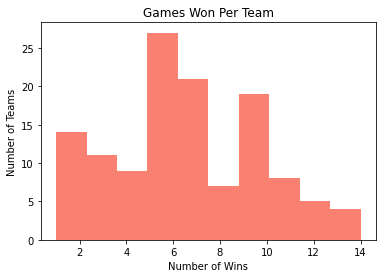

In [3087]:
plt.hist(df['win'],color='salmon')
plt.ylabel('Number of Teams')
plt.xlabel('Number of Wins')
plt.title('Games Won Per Team')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

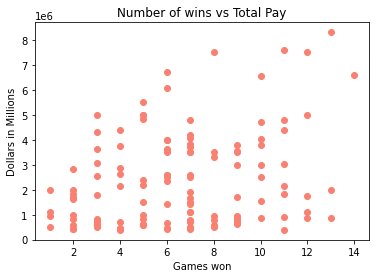

In [3088]:
plt.scatter(df['win'],df['TotalPay'],color='salmon')
plt.ylabel('Dollars in Millions')
plt.xlabel('Games won')
plt.title('Number of wins vs Total Pay')
plt.show

The win distribution is normal but there seems to be no correlation for games won and coaches pay.

##### Stadium Capacity 

<function matplotlib.pyplot.show(close=None, block=None)>

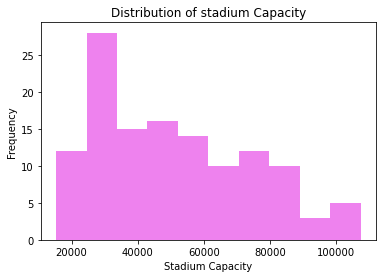

In [3089]:
plt.hist(df['stadium_capacity'],color='violet')
plt.ylabel('Frequency')
plt.xlabel('Stadium Capacity')
plt.title('Distribution of stadium Capacity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

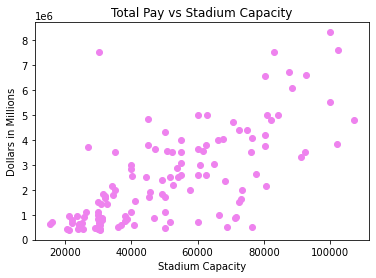

In [3090]:
plt.scatter(df['stadium_capacity'],df['TotalPay'],color='violet')
plt.ylabel('Dollars in Millions')
plt.xlabel('Stadium Capacity')
plt.title('Total Pay vs Stadium Capacity')
plt.show

The distribution seems to be noraml with a skewwed right side.  This probably new stadiums built recently and addons to exsisting stadiums.  This was seen being spoken about much during the information gathering phase.  This will lead to higher predicted salarys as well.  When looking at the TotalPay vs stadium_capacity we can see these two are correlated and the bigger the stadium the higher the pay of the coach.

##### gsr 

<function matplotlib.pyplot.show(close=None, block=None)>

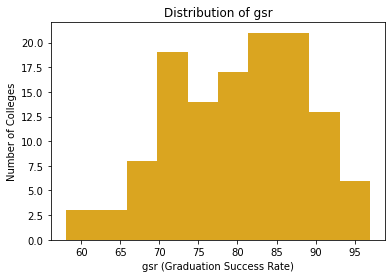

In [3091]:
plt.hist(df['gsr'],color = 'goldenrod')
plt.ylabel('Number of Colleges')
plt.xlabel('gsr (Graduation Success Rate)')
plt.title('Distribution of gsr')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

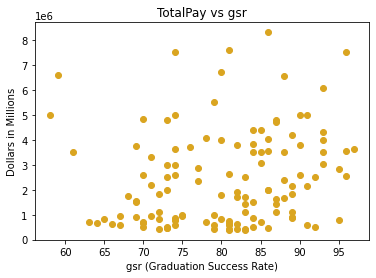

In [3092]:
plt.scatter(df['gsr'],df['TotalPay'],color = 'goldenrod')
plt.ylabel('Dollars in Millions')
plt.xlabel('gsr (Graduation Success Rate)')
plt.title('TotalPay vs gsr')
plt.show

The distribution of gsr is normal there seems to be not much correlation with gsr and TotalPay.

##### fgr

<function matplotlib.pyplot.show(close=None, block=None)>

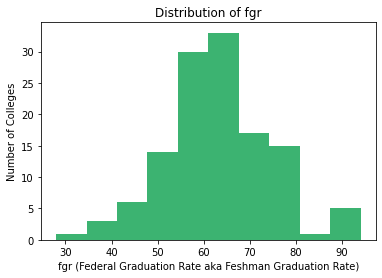

In [3093]:
plt.hist(df['fgr'],color = 'mediumseagreen')
plt.ylabel('Number of Colleges')
plt.xlabel('fgr (Federal Graduation Rate aka Feshman Graduation Rate)')
plt.title('Distribution of fgr')
plt.show

Text(0.5, 1.0, 'TotalPay vs fgr')

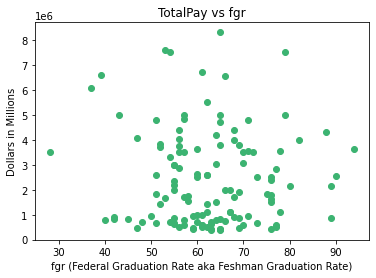

In [3094]:
plt.scatter(df['fgr'],df['TotalPay'],color = 'mediumseagreen')
plt.ylabel('Dollars in Millions')
plt.xlabel('fgr (Federal Graduation Rate aka Feshman Graduation Rate)')
plt.title('TotalPay vs fgr')

The fgr is a normal distribution and there is even less correlation with TotalPay compared to gsr.

##### Correlation Heat Map

C:\Users\Morga\AppData\Local\Temp\ipykernel_23804\2695585881.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


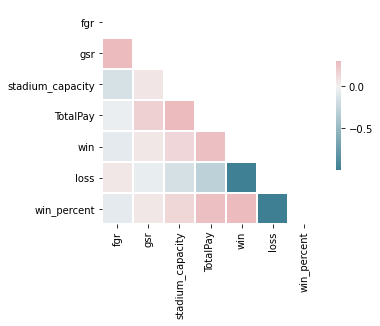

In [3095]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

There is negative correlation with wins and losses which makes sence as there is a set number of games.  We see a correlation between TotalPay except for loss which is negative which is to be expected.  There is however a negative correlation with fgr and TotalPay this is not expected and indicates fgr will probably be an issue when running the models and not preform as a good predictor.

# Splitting the data

In [3096]:
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

In [3097]:

# Selecting a random seed to make the test repeatable.
np.random.seed(1234)
# Giving each row a number from 0-1 resulting in a uniform distribution. 
df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
# Using the number given to each row that creates a unifrom distribution to create 
# a testing and training set the training set is 67% of the data
# the testing set is 33%
df_train = df[df['runiform'] >= 0.33]
df_test = df[df['runiform'] < 0.33]
# check training data frame shape
print('\ntraining data frame (rows, columns): ',df_train.shape)
# checking the first 5 rows of the testing data
print('\n Training df\n',df_test.head())
# check test data frame shape
print('\n\n\n\ntesting data frame (rows, columns): ',df_test.shape)
# checking the first 5 rows of the testing data
print('\n Testing df\n',df_test.head())



training data frame (rows, columns):  (90, 10)

 Training df
                  Conference  fgr  gsr  stadium_capacity         Coach  \
School                                                                  
Air Force          Mt. West   89   89             46692  Troy Calhoun   
Arizona              Pac-12   55   73             57803  Kevin Sumlin   
Arizona State        Pac-12   66   86             73379  Herm Edwards   
Central Florida         AAC   68   82             45301   Josh Heupel   
Coastal Carolina   Sun Belt   63   81             21000    Joe Moglia   

                  TotalPay  win  loss  win_percent  runiform  
School                                                        
Air Force           885000   10     3         76.9  0.191519  
Arizona            2000000    1    11          8.3  0.272593  
Arizona State      2000000    2    10         16.7  0.276464  
Central Florida    1700000    9     4         69.2  0.013768  
Coastal Carolina    400000   11     2         8

# Model Creation

##### Original Model

In [3098]:

# creating a string to use as the model input selecting for totalpay based on the other columns.
my_model = str('TotalPay ~ Conference  + gsr + fgr + stadium_capacity + win + loss + win_percent')

In [3099]:


# fit the model to the training set
train_model_fit = smf.ols(my_model, data = df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = train_model_fit.predict(df_test)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     18.28
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.26e-19
Time:                        15:18:51   Log-Likelihood:                -1359.3
No. Observations:                  90   AIC:                             2753.
Df Residuals:                      73   BIC:                             2795.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.43

C:\Users\Morga\AppData\Local\Temp\ipykernel_23804\787408866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = train_model_fit.fittedvalues
C:\Users\Morga\AppData\Local\Temp\ipykernel_23804\787408866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = train_model_fit.predict(df_test)


##### Original Model with full Data set

In [3100]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(df_test['TotalPay'].corr(df_test['predict_TotalPay']),2),3))

# creating a model from the full data set
# this can see the difference in R-squared and used for predictions
my_model_fit = smf.ols(my_model, data = df).fit()
print(my_model_fit.summary())


Proportion of Test Set Variance Accounted for:  0.617
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     22.93
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.37e-27
Time:                        15:18:51   Log-Likelihood:                -1890.5
No. Observations:                 125   AIC:                             3815.
Df Residuals:                     108   BIC:                             3863.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

##### Model #2

In [3101]:
# creating a string to use as the model input selecting for totalpay based on the other columns.
my_model_2 = str('TotalPay ~ Conference  + gsr + stadium_capacity + win')

In [3102]:
# fit the model to the training set
train_model_fit = smf.ols(my_model_2, data = df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
df_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
df_test['predict_TotalPay'] = train_model_fit.predict(df_test)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     21.70
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.95e-20
Time:                        15:18:51   Log-Likelihood:                -1362.1
No. Observations:                  90   AIC:                             2752.
Df Residuals:                      76   BIC:                             2787.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.46

C:\Users\Morga\AppData\Local\Temp\ipykernel_23804\1363461121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predict_TotalPay'] = train_model_fit.fittedvalues
C:\Users\Morga\AppData\Local\Temp\ipykernel_23804\1363461121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict_TotalPay'] = train_model_fit.predict(df_test)


##### Model 2 Using the full Data set

In [3103]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(df_test['TotalPay'].corr(df_test['predict_TotalPay']),2),3))

# creating a model from the full data set
# this can see the difference in R-squared and used for predictions
my_model_fit_2 = smf.ols(my_model_2, data = df).fit()
print(my_model_fit_2.summary())




Proportion of Test Set Variance Accounted for:  0.576
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     26.68
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.93e-28
Time:                        15:18:51   Log-Likelihood:                -1894.5
No. Observations:                 125   AIC:                             3817.
Df Residuals:                     111   BIC:                             3857.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

##### Reasoning for Model 2

When creating a model we have to take into account the goals of the model.  Goal one is to set a prediction method for a new football coach for Syracuse University.  Goal two the model should align with the objectives of the organization that is using the model.  With this in mind it didn't make much sense to keep the fgr as it was paying coaches less money for having more freshman graduate.  Since the goal of Syracuse University is to pass along knowledge and help students graduate this predictor was removed.  The goal of Syracuse Football is to win games, since win_percent was reducing coaches salaries this was also removed.  When win_percent is removed it caused salary to increase with loss, thus loss was also removed.  It makes a model that is slightly less accurate, but working more in line with the goals of the organization.

# Lab Questions

 What is the recommended salary for the Syracuse football coach?

In [3104]:
#Creating a new data frame containing syracuse information to be used in prediction questions for the lab
cuse=[{'School':'Syracuse','Conference':'ACC','fgr':76,'gsr':88,'stadium_capacity':49262,'win':5,'loss':7,'win_percent':41.7}]
Syracuse_coach = pd.DataFrame(cuse)

In [3105]:
#predicting the data frame and displaying the answer to the lab question 1
Syracuse_coach['predict_TotalPay'] = my_model_fit_2.predict(Syracuse_coach)
print('The recommended Salary for the Syracuse football coach is:',round(float(Syracuse_coach['predict_TotalPay'][Syracuse_coach['School']=='Syracuse']),2))

The recommended Salary for the Syracuse football coach is: 3119004.55


 What would his salary be if we were still in the Big East? What if we went to the Big 
Ten?

In [3106]:
# Creating new rows with the simulated data for lab question 2.
cuse.append({'School':'Syracuse_big_east','Conference':'AAC','fgr':76,'gsr':88,'stadium_capacity':49262,'win':5,'loss':7,'win_percent':41.7})
cuse.append({'School':'Syracuse_big_ten','Conference':'Big Ten','fgr':76,'gsr':88,'stadium_capacity':49262,'win':5,'loss':7,'win_percent':41.7})
#Recreating the data frame with new info added.
Syracuse_coach = pd.DataFrame(cuse)


In [3107]:
#predicting the data frame and displaying the answer to the lab question 1
Syracuse_coach['predict_TotalPay'] = my_model_fit_2.predict(Syracuse_coach)
print('If Syracuse was still in the Big East (now the AAC) the recommended Salary for the football coach would be:',round(float(Syracuse_coach['predict_TotalPay'][Syracuse_coach['School']=='Syracuse_big_east']),2))
print('If Syracuse was in the Big Ten the recommended Salary for the football coach would be:',round(float(Syracuse_coach['predict_TotalPay'][Syracuse_coach['School']=='Syracuse_big_ten']),2))

If Syracuse was still in the Big East (now the AAC) the recommended Salary for the football coach would be: 1648233.14
If Syracuse was in the Big Ten the recommended Salary for the football coach would be: 3770846.68


 What schools did we drop from our data and why?

The four schools dropped form the data were Baylor, Brigham Young, Rice, and Southern Methodist.  They were dropped because they did not have any information on pay. 

What effect does graduation rate have on the projected salary?


In [3108]:
print('The fgr (Federal Graduation Rate) from the original model, per point decreases salary by:',my_model_fit.params[12])
print("Again fgr was removed for model 2 \nbecause it didn't make sense to keep an attribute that pays coaches less for students graduating.")
print("The gsr (Graduation Success Rate) from model 2, per point increases salary by:",my_model_fit_2.params[11])

The fgr (Federal Graduation Rate) from the original model, per point decreases salary by: -12076.334224367161
Again fgr was removed for model 2 
because it didn't make sense to keep an attribute that pays coaches less for students graduating.
The gsr (Graduation Success Rate) from model 2, per point increases salary by: 9983.05474570904


 How good is our model?

In [3109]:
print("The Original Model preforms slightly better and could be used accounting for",
      round(my_model_fit.rsquared*100,2),
      "percent of the variation in coaches pay.\nWhile model 2 seems to align more with a University's goals, it accounts for",
      round(my_model_fit_2.rsquared*100,2,),
      "percent of the variation in coaches pay.")

The Original Model preforms slightly better and could be used accounting for 77.26 percent of the variation in coaches pay.
While model 2 seems to align more with a University's goals, it accounts for 75.75 percent of the variation in coaches pay.


 What is the single biggest impact on salary size?

In [3110]:
#Possible Salary Diff due to gsr
print("Max increase in coaches pay due to gsr is:",round((my_model_fit_2.params[11]*100),2))

Max increase in coaches pay due to gsr is: 998305.47


In [3111]:
# salary increase by winning all 12 games
print("Max increase in coaches pay due to winning games is:",round((my_model_fit_2.params[13]*12),2))

Max increase in coaches pay due to winning games is: 1205790.99


In [3112]:
#Possible Salary Diff due to stadium_capacity
print("Potential difference in pay from the stadium with the most capacity to the least is:",
      round((max(df['stadium_capacity'])*my_model_fit_2.params[12])-
            (min(df['stadium_capacity'])*my_model_fit_2.params[12]),2))   

Potential difference in pay from the stadium with the most capacity to the least is: 2011801.16


In [3113]:
#Possible increase in salary from the least paid conferrence to the most paid conference
print("Potential incease in salary from the least paid conference to the hightest is:",
      round(my_model_fit_2.params[9]-my_model_fit_2.params[6],2))

Potential incease in salary from the least paid conference to the hightest is: 2863064.64


As shown above the largest potential impact on salary size comes from which conference the team highering the coach plays in.  Yet Stadium Size is a close second. 

# Final Thoughts

The final predictions found did end up being slightly higher then the actual salary of the coaches.  This was to be expected and pointed out during the EDA.  Things that I would look at next are how long the contracts are used for and when was the current contract established.  How long has that coach been the head coach.  It is easier to keep a program and then start a new program.  It is possible to find the win percentage of the coaches previous team and factor that into his contract instead of the win loss of the last year.  This information isn't necessariy about the contract as a coach who previously was coaching a 12-0 team gets hired with a high salary and this could be his first year building a new program going 6-6 wouldn't be unheard of.  He hasn't had time yet to scout the students he wishes for his team and could be using a team that was based on a run game where his strategy is mainly passing.  There are many factors to consider. 

I would also like to note that gsr and fgr should be more important and coaches should be pushed to have college athelete do well in school.

# Bonus: Hierarchiacal Clustering Model

In [3114]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3115]:
# Removing non numerical columns that will not be used for clustering
conf = df['Conference'].to_list()
df.drop('Conference', axis=1, inplace=True)
df.drop('Coach', axis=1, inplace=True)


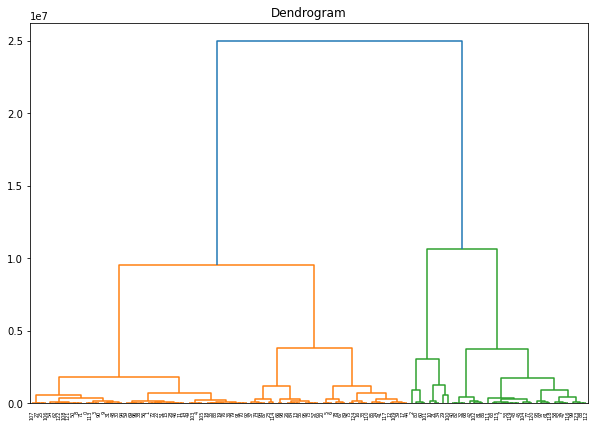

In [3116]:
# Creating the dendrogram for visual inspection
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(df, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

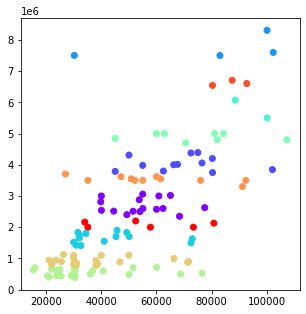

In [3117]:
# Selecting the number of clusters (11 for the number of conferences)
cluster_ea = AgglomerativeClustering(n_clusters=11, linkage='ward',affinity='euclidean')

# Visualizing the clustering
plt.figure(figsize =(5, 5))
plt.scatter(df['stadium_capacity'], df['TotalPay'], c = cluster_ea.fit_predict(df),cmap='rainbow')
plt.show()

In [3118]:
# Saving the cluster labels
labels = cluster_ea.fit_predict(df)

In [3119]:
# creating the cluster labels in the df
df['labels']=labels
# adding conference back to the data frame
df['Conference']=conf

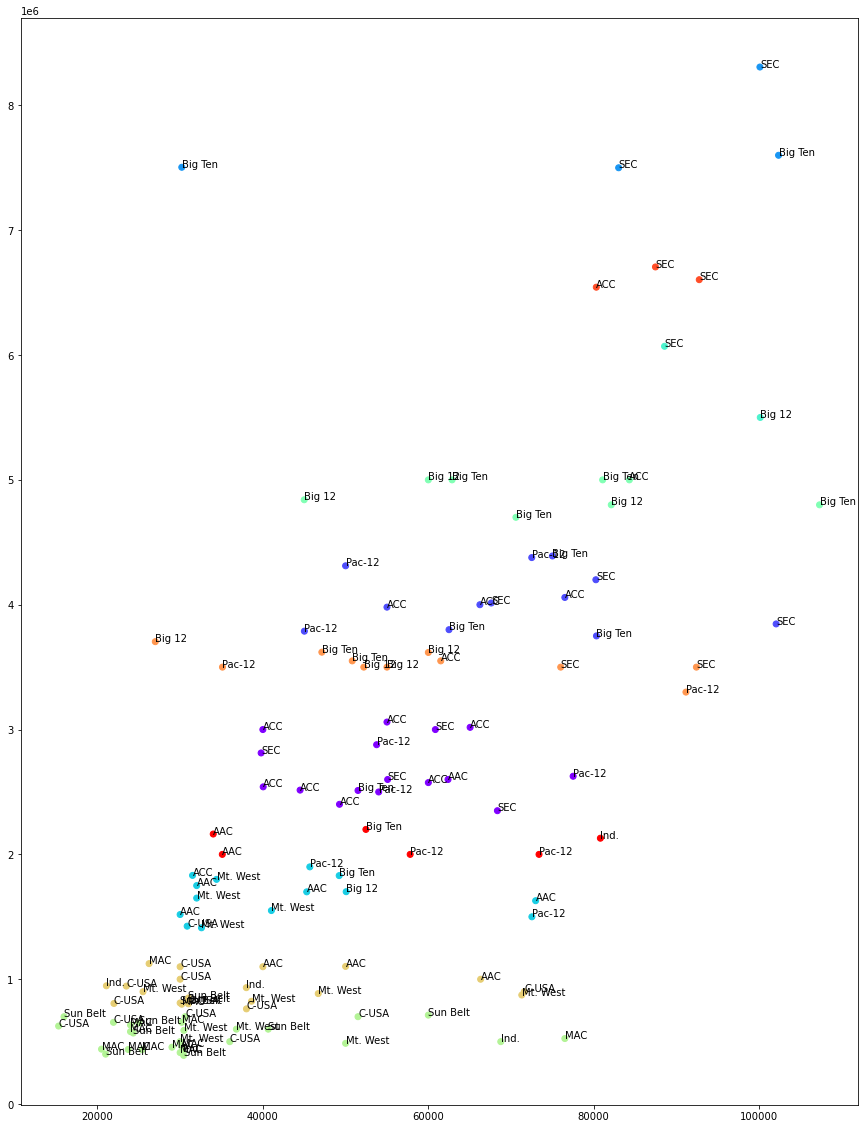

In [3120]:
plt.figure(figsize =(15, 20))
# Creating the same plot as before using labels column created previously
plt.scatter(df['stadium_capacity'], df['TotalPay'], c = df['labels'],cmap='rainbow')
# adding the true confrence names for visual comparison
[plt.text( x=row['stadium_capacity'],y=row['TotalPay'], s=row["Conference"]) for k,row in df.iterrows()]
plt.show()

This Hierrarchiacal Clustering was tested using cosine distance as well as complete and single linkage for both cosine and euclidine.  This was the closest still being off by a pretty large margin.  The clustering is mainly being made off the TotalPay, Basically clustering in bracets of different total pay amounts.